### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows

In [14]:
#load the dataset
import pandas as pd

df = pd.read_csv("Travel.csv")

# Displaying  shape and first 5 rows
print(f"Dataset Shape: {df.shape}")
df.head()


Dataset Shape: (4888, 20)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [15]:
#data exploration

df.info()

# Basic stats
df.describe()


# class distribution of target variable
df['ProdTaken'].value_counts(normalize='True')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

ProdTaken
0    0.811784
1    0.188216
Name: proportion, dtype: float64

In [16]:
#clases are imbalanced
# the amount of customers which didnt took the product is large 80% 
# so the marketing cost was quite high

 Missing Values %:


DurationOfPitch             5.135025
MonthlyIncome               4.766776
Age                         4.623568
NumberOfTrips               2.864157
NumberOfChildrenVisiting    1.350245
NumberOfFollowups           0.920622
PreferredPropertyStar       0.531915
TypeofContact               0.511457
dtype: float64

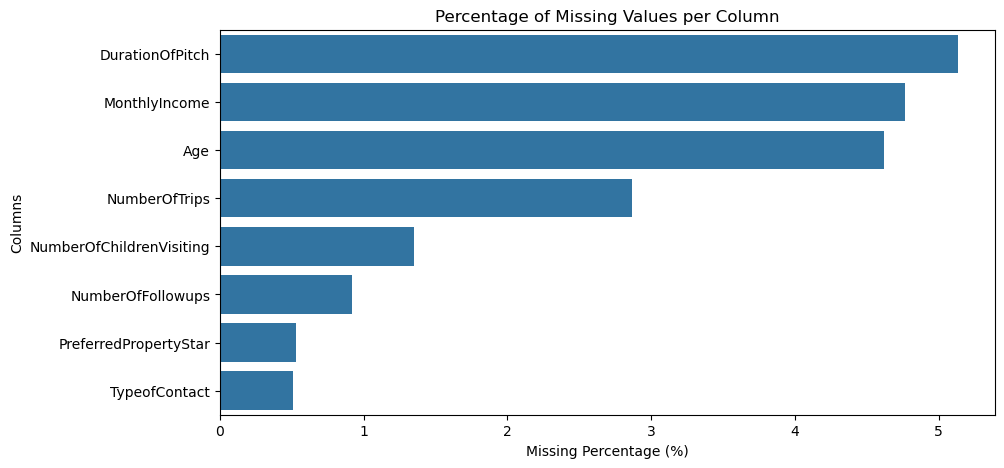

In [17]:
# visualizing the misisng values and deciding how to impute them 
# Calculating % of missing values per column
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0] #if missing vlaues are present then only column will be presented




# Display as table
from IPython.display import display
print(" Missing Values %:")
display(missing_percent)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_percent.values, y=missing_percent.index)
plt.title("Percentage of Missing Values per Column")
plt.xlabel("Missing Percentage (%)")
plt.ylabel("Columns")
plt.show()



In [18]:
# DurationOfPitch, MonthlyIncome, and Age have the highest missing rates, each above 4%, could impact model quality, these are to be imputated properly







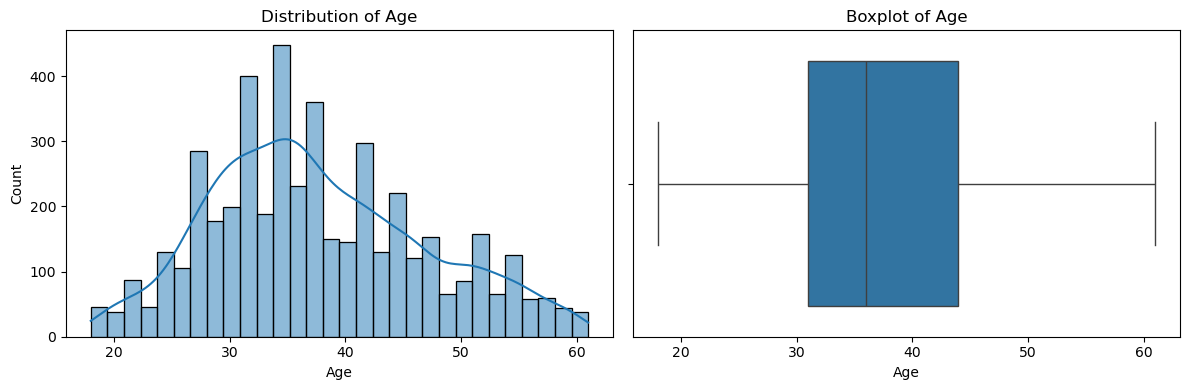

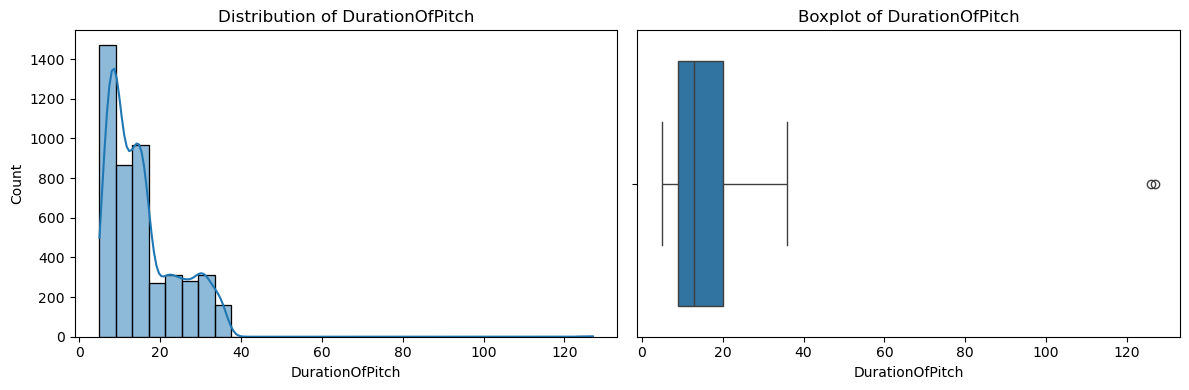

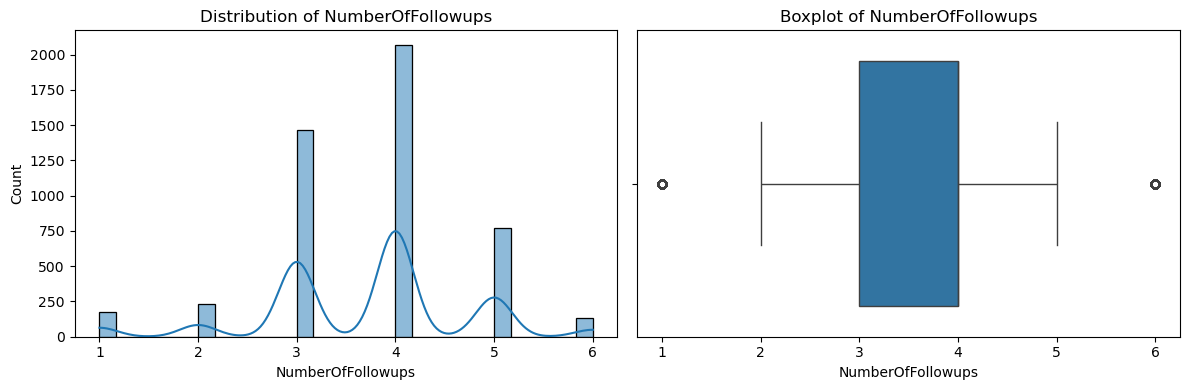

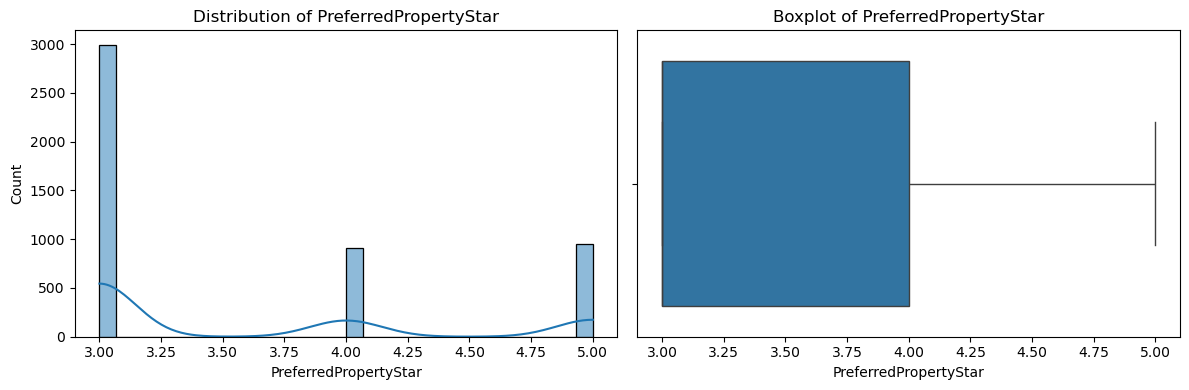

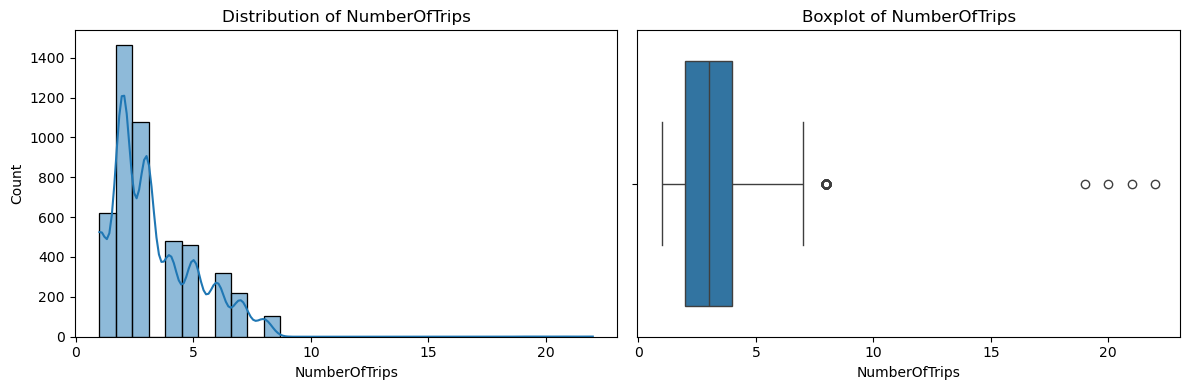

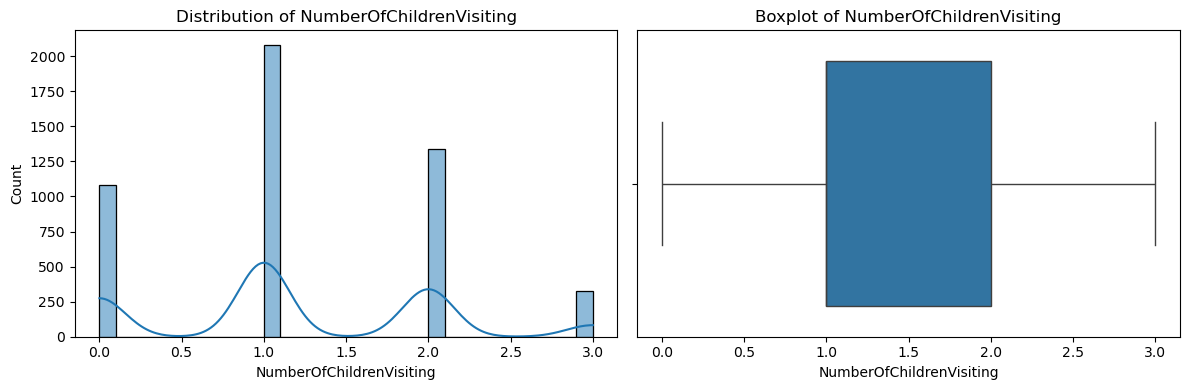

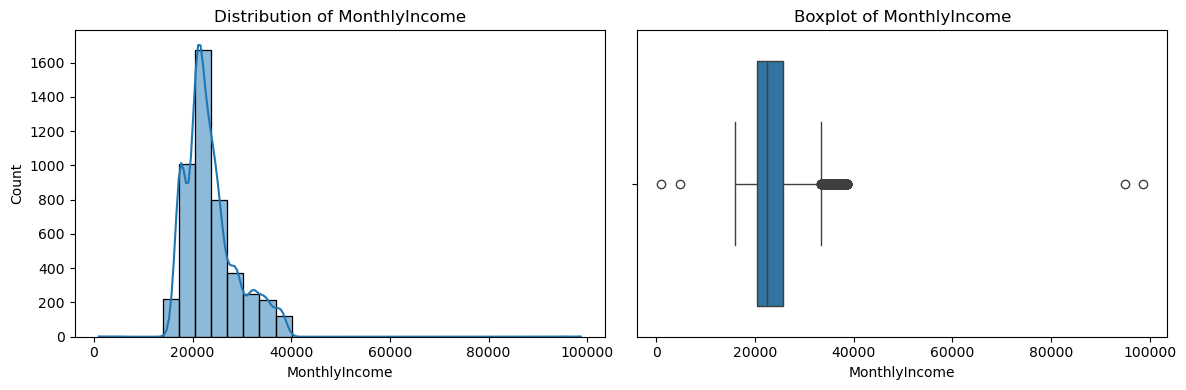

In [19]:
#Visualize Distributions of Numerical Missing Columns 
# histograms + boxplots side-by-side to choose median or mean

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#dropping the customer id from datasetas it has no impact 
df.drop(columns=['CustomerID'],inplace=True)

num_df = df.select_dtypes(include=['float64', 'int64'])


num_missing_cols = num_df.columns[num_df.isnull().any()]

for col in num_missing_cols:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True,bins=30)# for cont data bins=30 is a commonly used
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()
 

In [20]:
# filling columns with normal distribution no outliers with mean 
df['Age'] = df['Age'].fillna(df['Age'].mean())


#median for skewed distributions with large outliers and mode for discrete distributions withour outliers 
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)

C:\Users\Sujal Vairagi\AppData\Local\Temp\ipykernel_8604\303494158.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)
C:\Users\Sujal Vairagi\AppData\Local\Temp\ipykernel_8604\303494158.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [21]:
#filling categorial columns having missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Sujal Vairagi\AppData\Local\Temp\ipykernel_8604\901513093.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [22]:
#Feature Engineering – Creating and Transforming Features
# Copy original DataFrame to avoid mutation
df_fe = df.copy()

# 1. Create a new column: Age Group
df_fe['Age_Group'] = pd.cut(df_fe['Age'], 
                            bins=[0, 18, 30, 50, 70, 100], 
                            labels=['Teen', 'YoungAdult', 'Adult', 'Senior', 'Old'])

# 2. Convert Duration of Stay into a binary feature: Short Trip or Long Trip
df_fe['Is_Short_Trip'] = df_fe['DurationOfStay'].apply(lambda x: 1 if x <= 3 else 0)

# 3. Create interaction feature: Budget per Day
df_fe['BudgetPerDay'] = df_fe['EstimatedBudget'] / (df_fe['DurationOfStay'] + 1)  # +1 to avoid division by zero

# 4. Drop columns that are redundant now (optional)
df_fe.drop(['DurationOfStay'], axis=1, inplace=True)

# Preview new features
df_fe[['Age', 'Age_Group', 'DurationOfStay', 'Is_Short_Trip', 'EstimatedBudget', 'BudgetPerDay']].head()



KeyError: 'DurationOfStay'

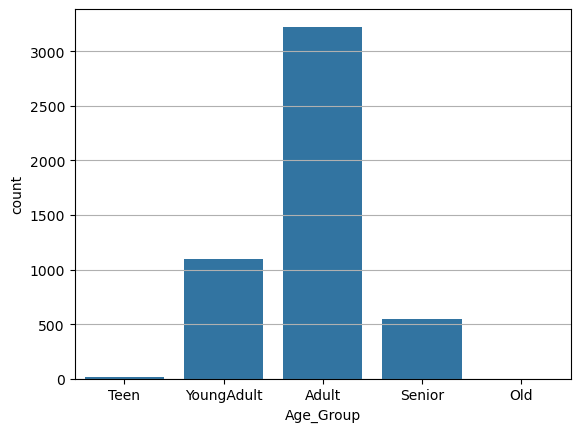

In [23]:
# Distribution of Age Groups
sns.countplot(x='Age_Group', data=df_fe)
plt.grid(axis='y')

# Fill missing values if any (optional)
df['TypeofContact'] = df['TypeofContact'].fillna('Unknown')

# Use Label Encoding since it's binary: 'Self Enquiry' / 'Company Invited'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['TypeofContact'] = le.fit_transform(df['TypeofContact'])


In [24]:
#Encoding and Preprocessing using column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# set the target to prodtaken 
target='ProdTaken'
# Define X and y
X = df_fe.drop(columns=[target])
y = df_fe[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Column Transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)])

In [25]:
#training model with pipeline 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)])

# Define the pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,class_weight='balanced'))
])


# Fit the pipeline on training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'CityTier',
                                                   'DurationOfPitch',
                                                   'NumberOfPersonVisiting',
                                                   'NumberOfFollowups',
                                                   'PreferredPropertyStar',
                                                   'NumberOfTrips', 'Passport',
                                                   'PitchSatisfactionScore',
                                                   'OwnCar',
                                                   'NumberOfChildrenVisiting',
                                                   'MonthlyIncome']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['TypeofContact',
                                                   'Occupation', 'Gender',
                                                   'ProductPitched',
                                                   'MaritalStatus',
                                                   'Designation',
                                                   'Age_Group'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

Training Accuracy: 1.0000
Testing Accuracy: 0.9141

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       794
           1       0.97      0.56      0.71       184

    accuracy                           0.91       978
   macro avg       0.94      0.78      0.83       978
weighted avg       0.92      0.91      0.90       978



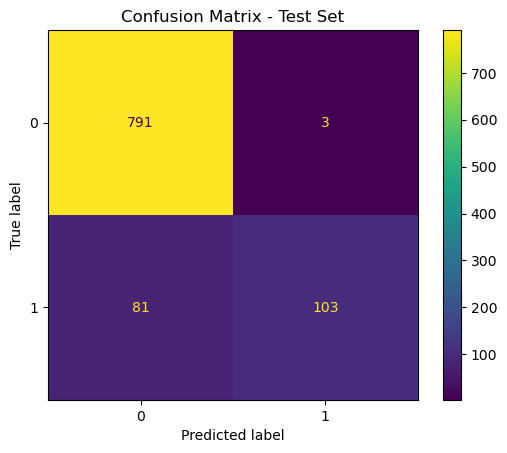

In [26]:
#Model Evaluation on Train & Test Set
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Predict on training and test sets
y_train_pred = rf_pipeline.predict(X_train)
y_test_pred = rf_pipeline.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Classification Report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Confusion Matrix - Test Set")
plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest inside the pipeline
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__class_weight': [None, 'balanced']
}

# GridSearchCV with pipeline
grid_search = GridSearchCV(
    estimator=rf_pipeline,             #  pipeline, not just RF model
    param_grid=param_grid,
    cv=5,
    scoring='recall_macro',                
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get best model from tuning
best_model = grid_search.best_estimator_

# Display best parameters
print("Best Parameters Found:", grid_search.best_params_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters Found: {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


 Training Accuracy: 0.9926
 Testing Accuracy:  0.9110

 Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       794
           1       0.85      0.64      0.73       184

    accuracy                           0.91       978
   macro avg       0.89      0.81      0.84       978
weighted avg       0.91      0.91      0.91       978



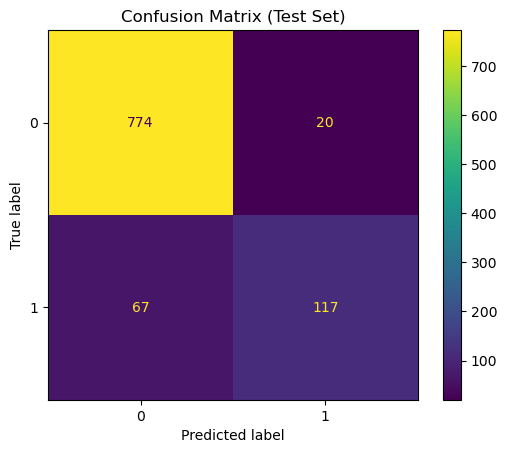

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on train and test sets using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f" Training Accuracy: {train_acc:.4f}")
print(f" Testing Accuracy:  {test_acc:.4f}\n")

# Classification Report
print(" Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
disp.plot()
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [29]:
# # confusion matrix get worse after tuning even after accuracy stayed same
# GridSearchCV tried to balance precision and recall across both classes using f1_macro

#here FN:  Predicted customer won't buy the product, but they would have taken is more costly than just the marketing cost
# to target sure-buyers, then false positive become costly so now we run the tuning using 'recall'


C:\Users\Sujal Vairagi\AppData\Local\Temp\ipykernel_8604\1942386048.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


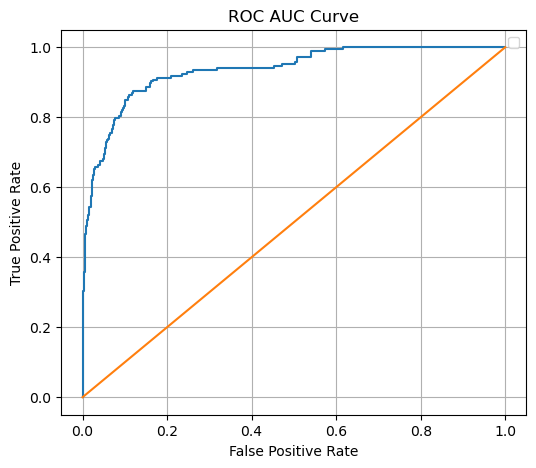

In [35]:
#roc auc curve
# Get probability predictions
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.legend()
plt.grid(True)
plt.show()

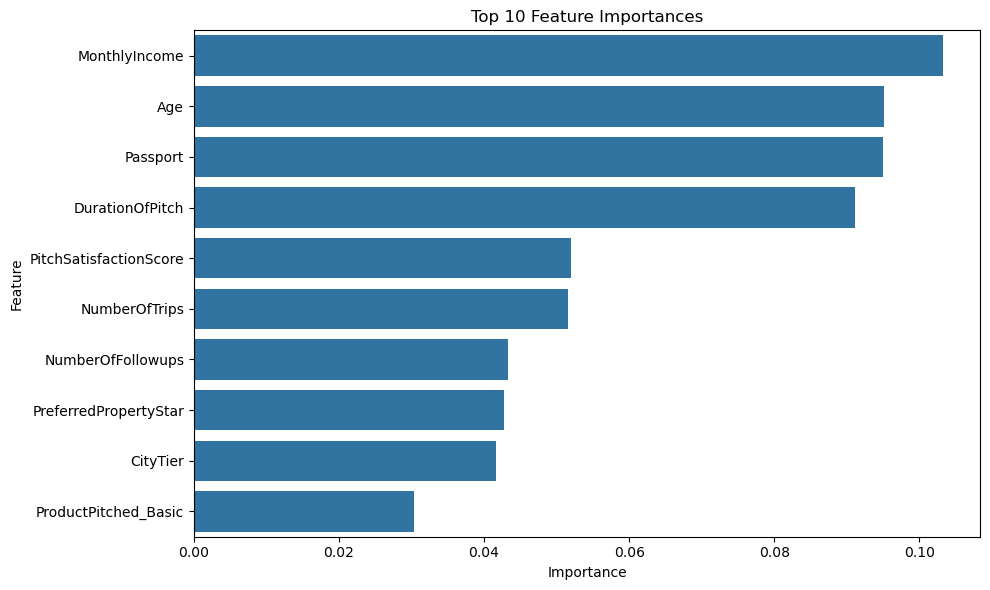

In [39]:
#Feature Importances
# 1. Get OneHotEncoder column names
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_cols)

# 2. Combine with numerical column names
feature_names = numerical_cols + list(encoded_cat_features)

# 3. Get importances
importances = best_model.named_steps["classifier"].feature_importances_

# 4. Now build DataFrame (✅ Now both lists are equal in length)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(10))
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
#MonthlyIncome, Age, and Passport are the top predictors, showing financial and demographic factors strongly influence outcomes